# Metody Obliczeniowe w Nauce i Technice
# Laboratorium 4: Symulowane wyżarzanie
## Przemysław Roman

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

def time_exec(func, *args):
    start_time = time.time()
    result = func(*args)
    return result, time.time() - start_time

def print_exec_time(t):
    print(f'Czas wykonania: {t}[s]')

## Zadanie 1 TSP

Wygeneruj chmurę n losowych punktów w 2D, a następnie zastosuj algorytm symulowa-
nego wyżarzania do przybliżonego rozwiązania problemu komiwojażera dla tych punk-
tów.
1. Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości n oraz 3
różnych układów punktów w 2D (rozkład jednostajny, rozkład normalny z czterema
różnymi grupami parametrów, dziewięć odseparowanych grup punktów).
2. Zbadaj wpływ sposobu generacji sąsiedniego stanu (consecutive swap vs. arbitrary
swap) oraz funkcji zmiany temperatury na zbieżność procesu optymalizacji.
3. Przedstaw wizualizację (saoptimset) działania procedury minimalizującej funkcję
celu.

### 1. Wizualizacje rozwiązań dla różnych parametrów
Przyjmuję poniższą funkcję temperatury jako domyślną

In [5]:
from SimulatedAnnealingTSP import PointsGeneratorTSP, SimulatedAnnealingTSP

SEED = 5040

def get_next_T_func(init_T, T, i, n_iterations):
    return T * 0.995

a) Rozkład jednostajny, mała liczba wierzchołków

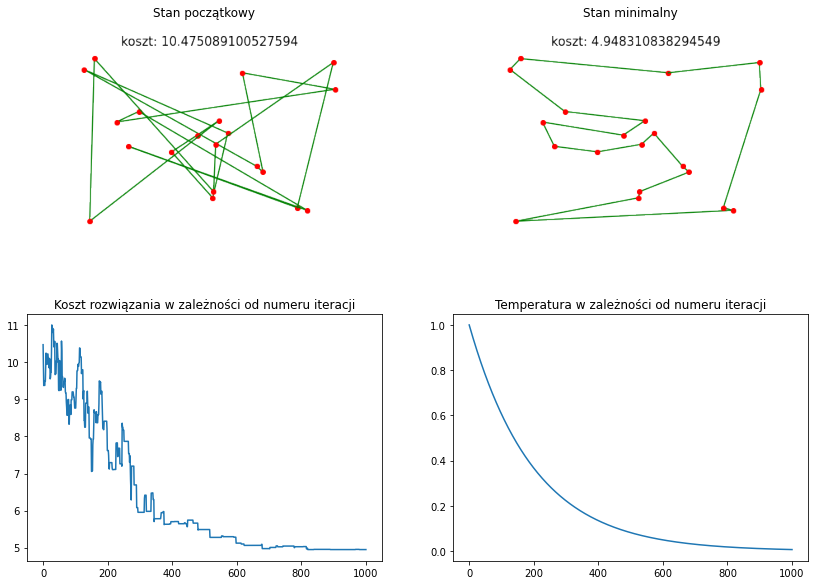

In [6]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_uniform(n=20)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**3, init_T=1,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_uniform_small',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

b) Rozkład jednostajny, średnia liczba wierzchołków

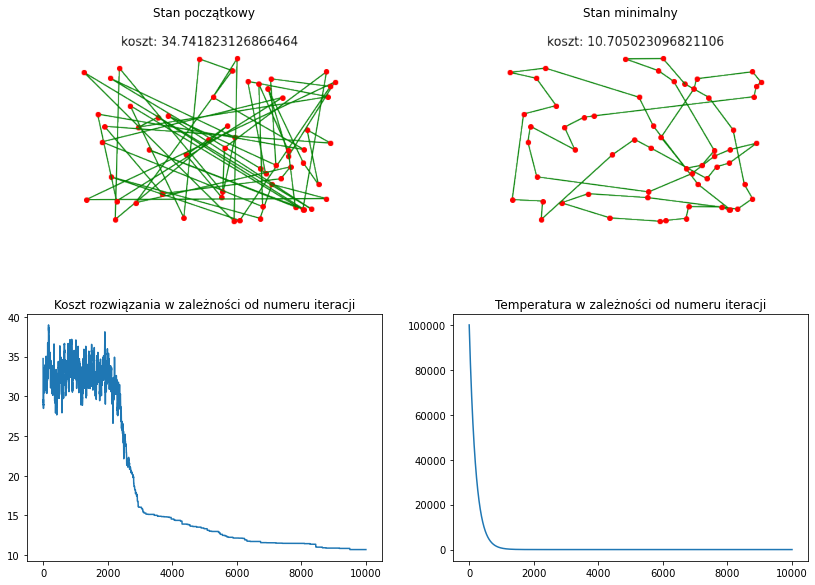

In [7]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_uniform(n=60)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_uniform_medium',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

c) Rozkład jednostajny, duża liczba wierzchołków

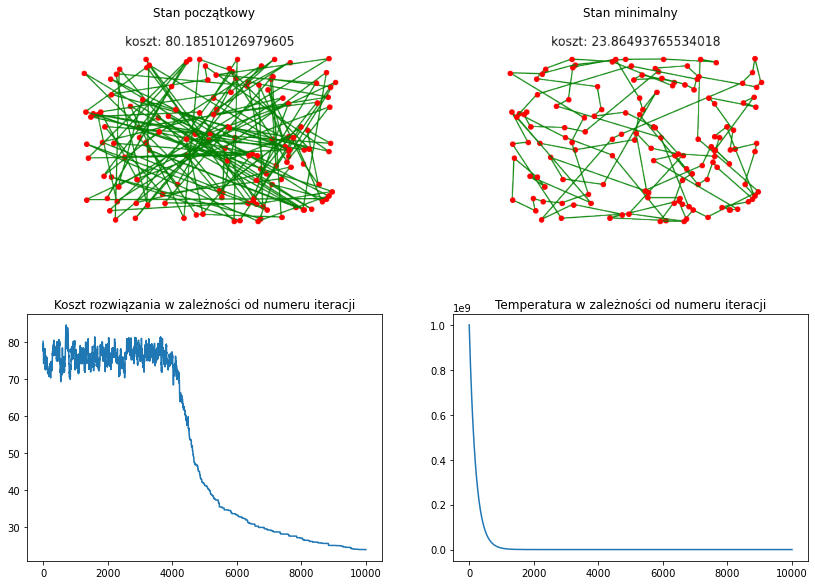

In [8]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_uniform(n=140)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**9,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_uniform_big',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

d) Rozkład normalny $ \mu = 0, \sigma = 1 $, domyślne parametry

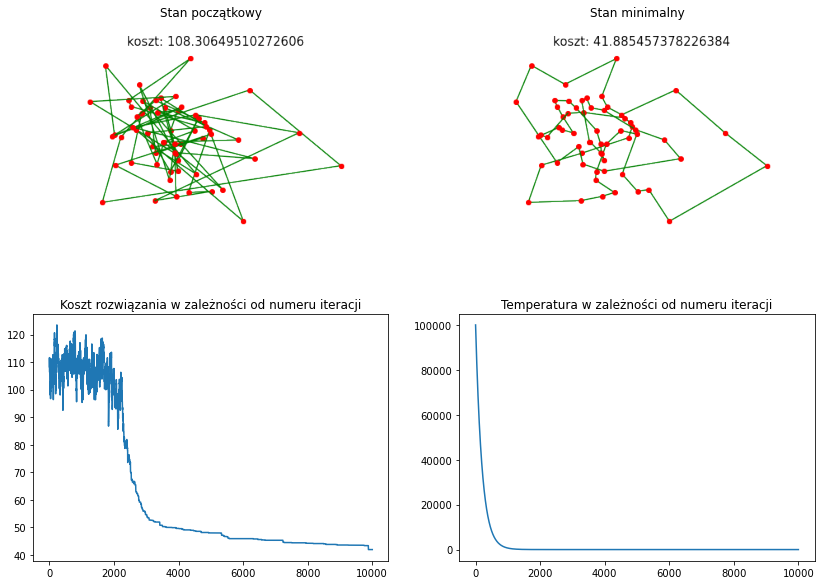

In [9]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_normal(n=60, mu=0, sigma=1) # domyślny

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_normal_mu0_sigma1',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

e) Rozkład normalny $ \mu = 0, \sigma = 1 $, leptokurtyczny

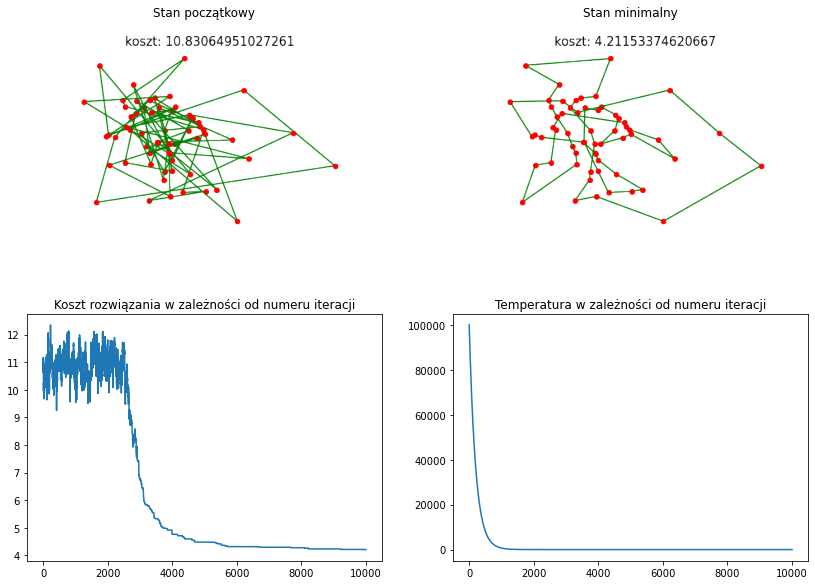

In [10]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_normal(n=60, mu=0, sigma=0.1) # ostry

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_normal_mu0_sigma01',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

f) Rozkład normalny $ \mu = 0, \sigma = 3 $, platykurtyczny

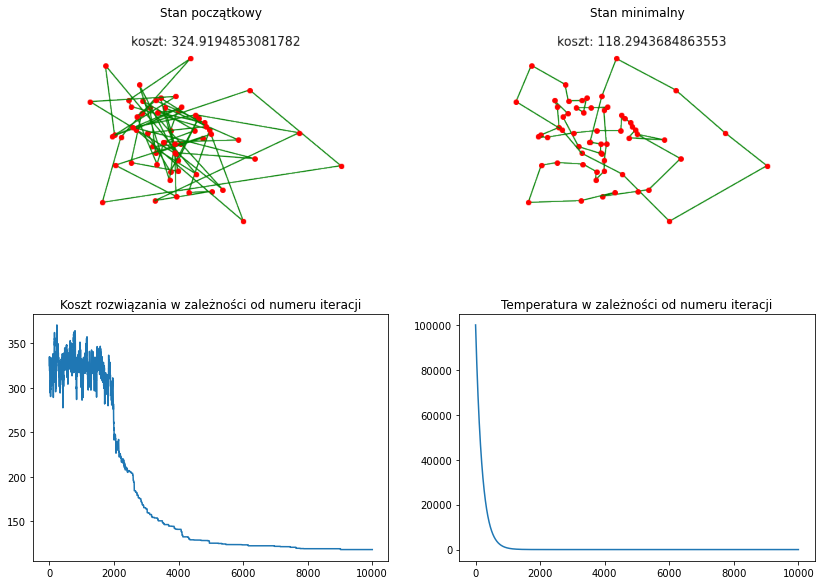

In [11]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_normal(n=60, mu=0, sigma=3) # łagodny

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_normal_mu0_sigma3',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

g) Rozkład normalny $ \mu = 10, \sigma = 0 $, przesunięty

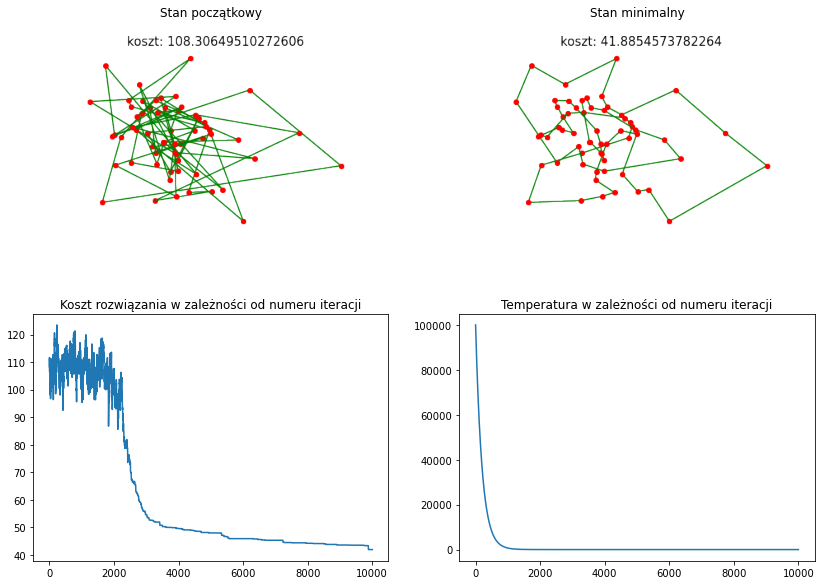

In [12]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_normal(n=60, mu=10, sigma=1)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_normal_mu-10_sigma1',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

h) Rozkład jednostajny, 9 odseparowanych grup punktów

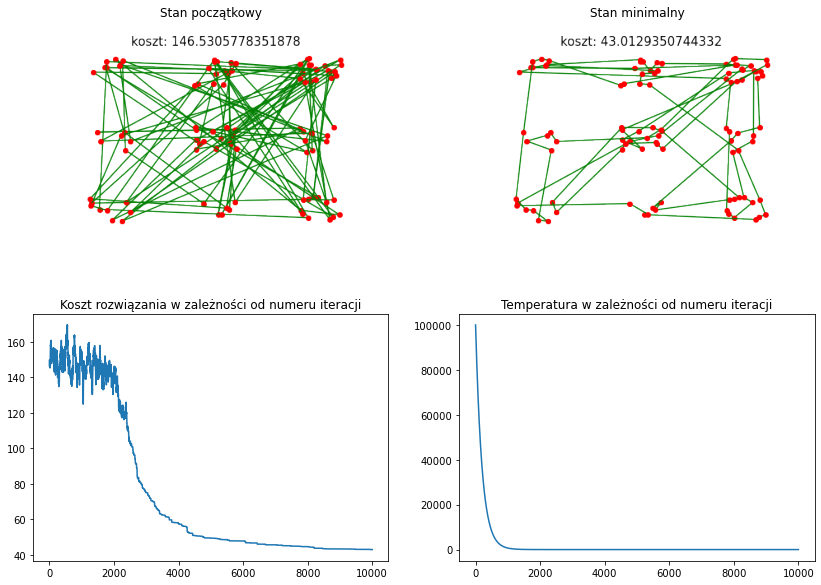

In [13]:
PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_groups(n=100, x_n_groups=3, y_n_groups=3, density=0.2)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=10**4, init_T=10**5,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_groups9',
                            seed=SEED)
TSP.perform(init_min_imgs=True, gif=False)
TSP.show_all()
TSP.clear()

### 2. Porównanie consecutive, arbitrary swap oraz zmienionej funkcji temperatury


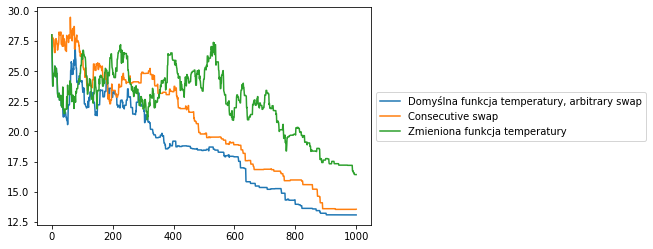

In [14]:
from SimulatedAnnealingTSP import PointsGeneratorTSP, SimulatedAnnealingTSP

SEED = 5040

def get_next_T_func(init_T, T, i, n_iterations):
    return T * 0.995

PGTSP = PointsGeneratorTSP(seed=SEED)
init_features = PGTSP.generate_uniform(n=50)
n_iterations = 10**3
init_T = 1

TSP = SimulatedAnnealingTSP(init_features, n_iterations=n_iterations, init_T=init_T,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_default',
                            seed=SEED, consecutive_swap=False)
TSP.perform(init_min_imgs=False, gif=False)
plt.plot(list(range(n_iterations+1)), TSP.costs, label='Domyślna funkcja temperatury, arbitrary swap')

TSP = SimulatedAnnealingTSP(init_features, n_iterations=n_iterations, init_T=init_T,
                            get_next_T_func=get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_consecutive',
                            seed=SEED, consecutive_swap=True)
TSP.perform(init_min_imgs=False, gif=False)
plt.plot(list(range(n_iterations+1)), TSP.costs, label='Consecutive swap')

def custom_get_next_T_func(init_T, T, i, n_iterations):
    return init_T * (1 - i/n_iterations)

TSP = SimulatedAnnealingTSP(init_features, n_iterations=n_iterations, init_T=init_T,
                            get_next_T_func=custom_get_next_T_func,
                            save_file_dir='output', save_file_name_base='tsp_custom_temperature_func',
                            seed=SEED, consecutive_swap=False)
TSP.perform(init_min_imgs=False, gif=False)
plt.plot(list(range(n_iterations+1)), TSP.costs, label='Zmieniona funkcja temperatury')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Dla dobranych parametrów widać, że zmieniona funkcja temperatury nie jest trafiona, zbiega wolniej niż pozostałe warianty.
Conscutive swap osiąga gorsze wyniki niż arbitrary swap co nie zgadza się z [informacjami](https://en.wikipedia.org/wiki/Simulated_annealing#Selecting_the_parameters) (podsekcja Efficient candidate generation), znalezionymi przeze mnie w internecie,
według których consecutive swap powinien dawać lepsze wyniki.

## Zadanie 2 Obraz binarny

Wygeneruj losowy obraz binarny o rozmiarze n × n i wybranej gęstości δ czarnych punk-
tów δ = 0.1, 0.3, 0.4. Korzystając z różnego typu sąsiedztwa (4-sąsiadów, 8-sąsiadów,
8-16-sąsiadów) zaproponuj funkcję energii (np. w bliskiej odległości te same kolory przy-
ciągają się, a w dalszej odpychają się) i dokonaj jej minimalizacji za pomocą algorytmu
symulowanego wyżarzania. W jaki sposób można generować stany sąsiednie? Jak róż-
nią się uzyskane wyniki w zależności od rodzaju sąsiedztwa, wybranej funkcji energii i
szybkości spadku temperatury?

### W jaki sposób można generować stany sąsiednie?
Stan sąsiedni można generować przez zamianę dwóch losowych pikseli a następnie ponowne przeliczenie kosztu tylko dla tych pikseli, których ta zamiana dotyczyła oraz ich sąsiadów.

In [8]:
from SimulatedAnnealingBinaryImage import SimulatedAnnealingBinaryImage, BinaryImage

SEED = 5040

def get_next_T_func(init_T, T, i, n_iterations):
    return T * 0.999

W poniższych testach sprawdzany jest wpływ sąsiedztwa na działanie algorytmu.
Dla każdego sąsiedztwa sprawdzane są gęstości δ = 0.1, 0.4.
Pozostałe parametry:
- funkcja temperatury: get_next_T_func (powyższy blok)
- ilość iteracji: $ 10^5 $
- temperatura początkowa: $ 10^{10} $
- rozmiar obrazu binarnego: $ 128\times128 $ (Program liczy większe obrazy w rozsądnym czasie ale do przetestowania wpływu sąsiedztwa taki rozmiar w zupełności wystarcza)

### 1. Sąsiedztwo 4

In [9]:
def get_cost_func_neighborhood_4(features, i, j, img_width, img_height, neighborhood):
    neighbors_cnt = 0

    for nd in neighborhood:
        ndi, ndj = nd
        if BinaryImage.valid_coords(i+ndi, j+ndj, img_width, img_height):
            neighbors_cnt += features[i+ndi][j+ndj]

    return neighbors_cnt ** 2

neighborhood_4 = [(0, 1), (1, 0), (0, -1), (-1, 0)]

a) δ = 0.1

Czas wykonania: 17.403854846954346[s]


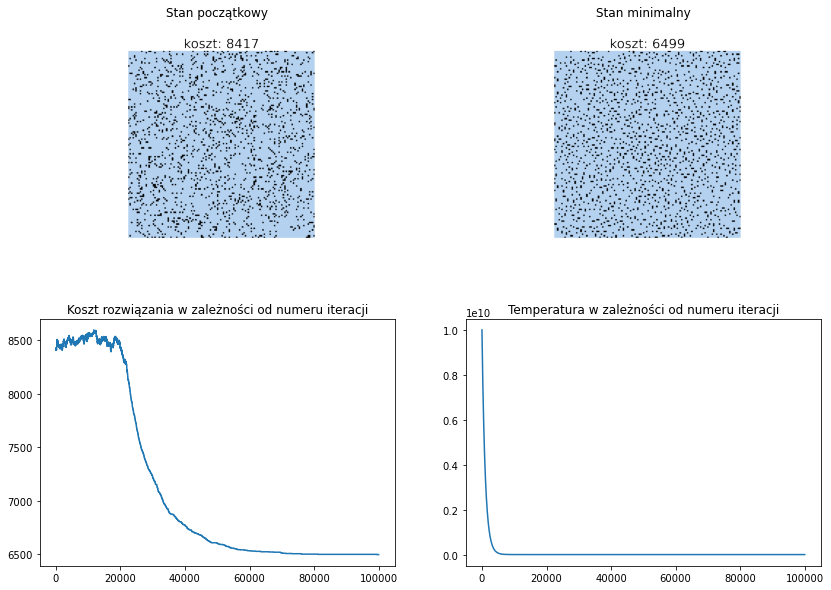

In [10]:
init_features = BinaryImage.generate(128, 128, density=0.1)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_neighborhood_4,
                                        neighborhood=neighborhood_4,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_neighborhood_4_d01_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

b) δ = 0.4

Czas wykonania: 17.26464080810547[s]


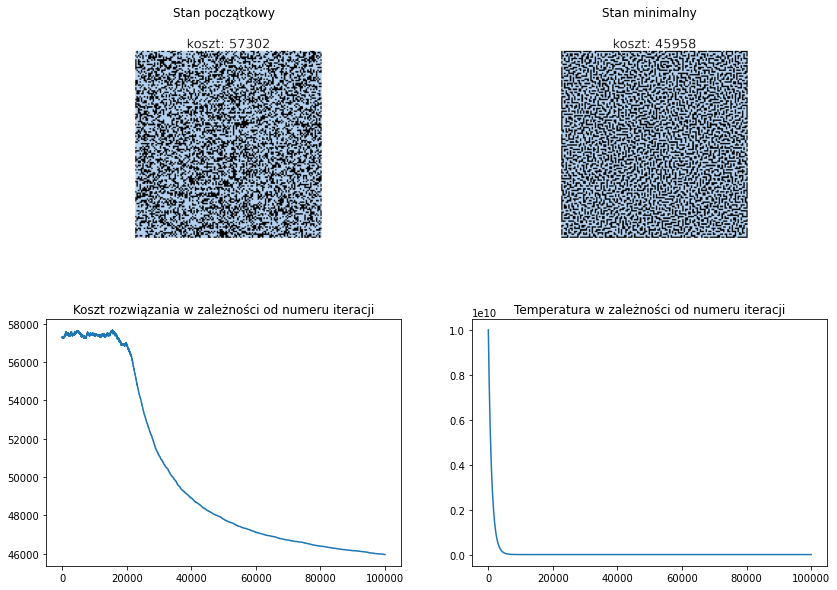

In [11]:
init_features = BinaryImage.generate(128, 128, density=0.4)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_neighborhood_4,
                                        neighborhood=neighborhood_4,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_neighborhood_4_d04_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

### 2. Sąsiedztwo 8

In [30]:
def get_cost_func_neighborhood_8(features, i, j, img_width, img_height, neighborhood):
    neighbors_cnt = 0

    for nd in neighborhood:
        ndi, ndj = nd
        if BinaryImage.valid_coords(i+ndi, j+ndj, img_width, img_height):
            neighbors_cnt += features[i+ndi][j+ndj]

    return neighbors_cnt ** 2

neighborhood_8 = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]

a) δ = 0.1

Czas wykonania: 50.90566062927246[s]


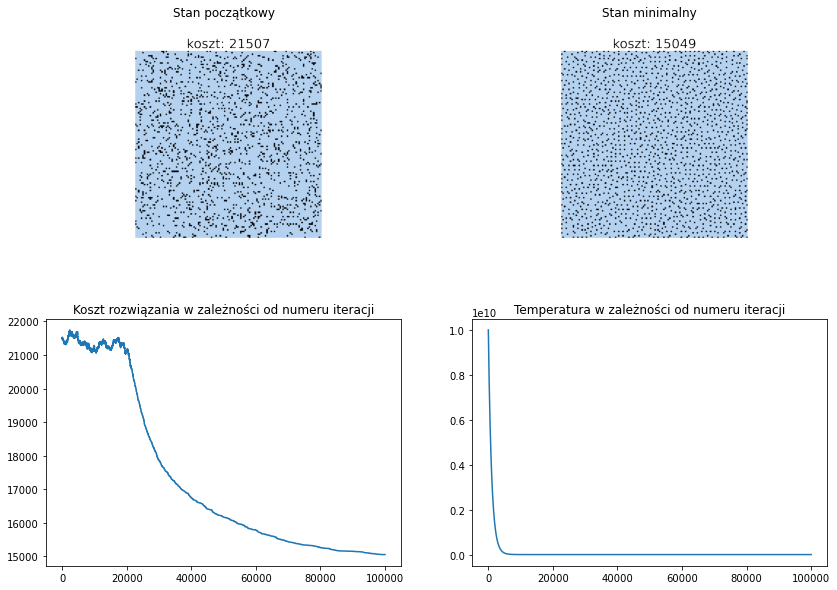

In [76]:
init_features = BinaryImage.generate(128, 128, density=0.1)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_neighborhood_8,
                                        neighborhood=neighborhood_8,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_neighborhood_8_d01_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

b) δ = 0.4

Czas wykonania: 50.2090847492218[s]


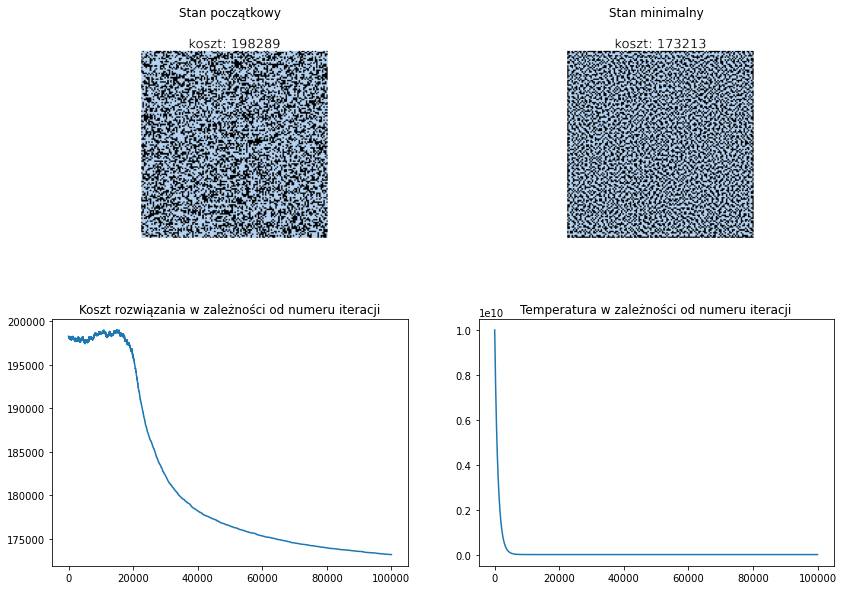

In [77]:
init_features = BinaryImage.generate(128, 128, density=0.4)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_neighborhood_8,
                                        neighborhood=neighborhood_8,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_neighborhood_8_d04_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

### 3. Sąsiedztwo 16

In [21]:
def get_cost_func_neighborhood_16(features, i, j, img_width, img_height, neighborhood):
    neighbors_cnt = 0

    for nd in neighborhood:
        ndi, ndj = nd
        if BinaryImage.valid_coords(i+ndi, j+ndj, img_width, img_height):
            neighbors_cnt += features[i+ndi][j+ndj]

    return neighbors_cnt ** 2

neighborhood_16 = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1),
                   (0, 2), (2, 0), (-2, 0), (0, -2), (1, 2), (2, 1), (-2, 1), (-1, -2)]

a) δ = 0.1

Czas wykonania: 179.4445924758911[s]


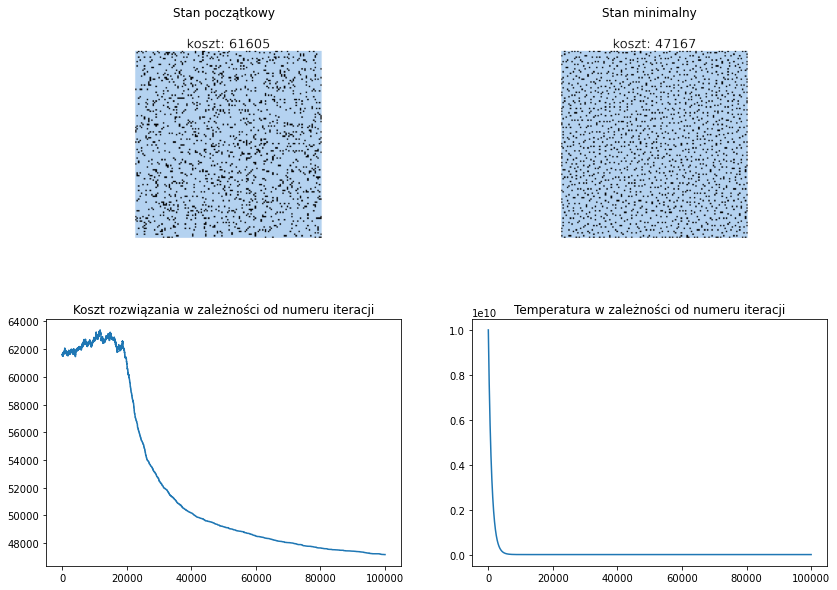

In [78]:
init_features = BinaryImage.generate(128, 128, density=0.1)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_neighborhood_16,
                                        neighborhood=neighborhood_16,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_neighborhood_16_d01_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

b) δ = 0.4

Czas wykonania: 177.39245462417603[s]


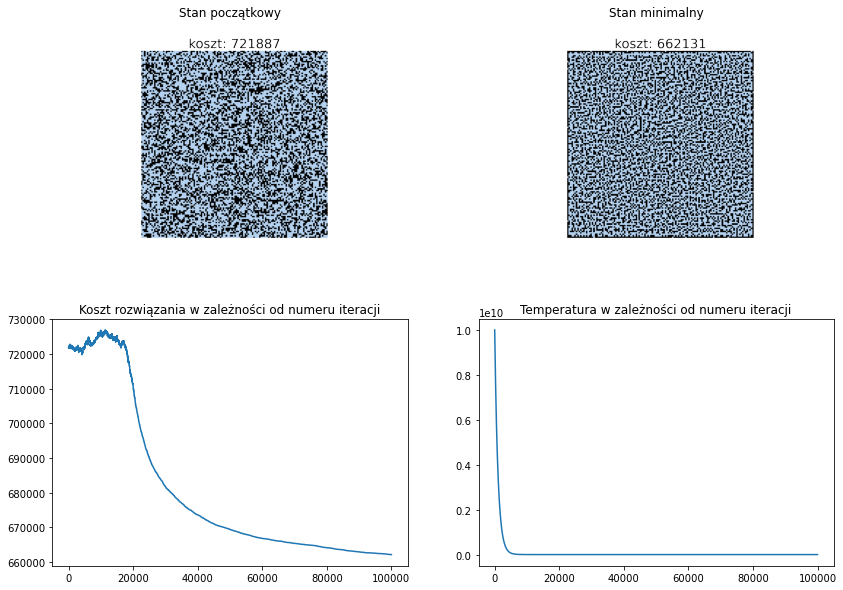

In [79]:
init_features = BinaryImage.generate(128, 128, density=0.4)
bin_img = SimulatedAnnealingBinaryImage(init_features=init_features,
                                        n_iterations=10**5,
                                        init_T=10**10,
                                        get_next_T_func=get_next_T_func,
                                        get_cost_func=get_cost_func_neighborhood_16,
                                        neighborhood=neighborhood_16,
                                        save_file_dir='output',
                                        save_file_name_base='bin_img_neighborhood_16_d04_128x128')
res, t = time_exec(bin_img.perform, True, False) # init_min_imgs, gif
print_exec_time(t)
bin_img.show_all()

### Jak różnią się uzyskane wyniki w zależności od rodzaju sąsiedztwa?
Testowane przeze mnie sąsiedztwa nie mają większego wpływu na wygląd wykresu funkcji kosztu w zależności od numeru iteracji.
Mają one wpływ na wygląd rozwiązania.

## Zadanie 3 Sudoku

Napisz program poszukujący rozwiązania łamigłówki Sudoku za pomocą symulowanego
wyżarzania. Plansza 9 × 9 ma zostać wczytana z pliku tekstowego, w którym pola puste
zaznaczone są znakiem x. Jako funkcję kosztu przyjmij sumę powtórzeń cyfr występu-
jących w wierszach bloku 9 × 9, kolumnach bloku 9 × 9 oraz blokach 3 × 3. Zaproponuj
metodę generacji stanu sąsiedniego. Przedstaw zależność liczby iteracji algorytmu od
liczby pustych miejsc na planszy. Czy Twój program jest w stanie znaleźć poprawne
rozwiązanie dla każdej z testowanych konfiguracji wejściowych?